### DEEPFACE

Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace, Dlib and SFace.

In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
img1_path = "tests/dataset/img20.jpg"
img2_path = "tests/dataset/img21.jpg"
img3_path = "tests/dataset/img4.jpg"
img4_path = "tests/dataset/img35.jpg"

In [4]:
img1 = DeepFace.detectFace(img1_path)
img2 = DeepFace.detectFace(img2_path)
img3 = DeepFace.detectFace(img3_path)
img4 = DeepFace.detectFace(img4_path)

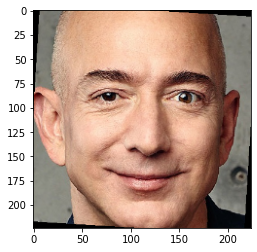

In [5]:
plt.imshow(img1)

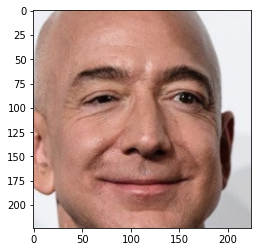

In [6]:
plt.imshow(img2)

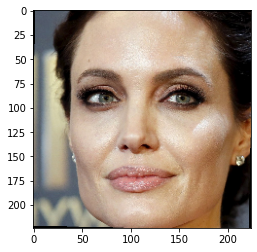

In [7]:
plt.imshow(img3)

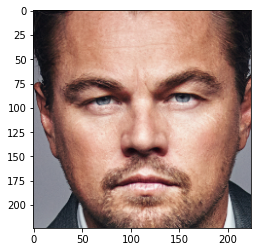

In [8]:
plt.imshow(img4)

### FACENET

FaceNet model expects 160×160 RGB images whereas it produces 128-dimensional representations. Auto-encoded representations called embeddings in the research paper. Additionally, researchers put an extra l2 normalization layer at the end of the network. Remember what l2 normalization is.

Researchers also mentioned that they used euclidean distance instead of cosine similarity to find similarity between two vectors. Euclidean distance basically finds distance of two vectors on an euclidean space.

In [9]:
model_name = 'Facenet'
# model_name = 'ArcFace'
# model_name = 'VGG-Face'

### FACIAL VERIFICATION
This function verifies face pairs as same person or different persons. It expects exact image paths as inputs. Passing numpy or base64 encoded images is also welcome. Then, it is going to return a dictionary and you should check just its verified key.

In [10]:
result = DeepFace.verify(img1_path = img1_path, img2_path = img2_path, model_name = model_name)

In [11]:
result

{'verified': True,
 'distance': 0.10258413263713839,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

### FACE RECOGNITION

Face recognition requires applying face verification many times. Herein, deepface has an out-of-the-box find function to handle this action. It's going to look for the identity of input image in the database path and it will return pandas data frame as output.

In [12]:
df = DeepFace.find(img_path = img3_path, db_path = "G:\\00_ZHAR_PROJECT_1\JTK_POLBAN\\00_SEMESTER 5\Pengolahan Citra Digital Praktek\deepface\\tests\dataset", model_name = model_name)

There are  64  representations found in  representations_facenet.pkl
find function lasts  1.213846206665039  seconds


In [13]:
df

,identity,Facenet_cosine
0,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,2.220446e-16
1,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,1.314529e-01
2,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,1.654539e-01
3,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,1.745384e-01
4,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,1.771513e-01
5,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,1.804234e-01
6,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,2.079426e-01
7,G:\00_ZHAR_PROJECT_1\JTK_POLBAN\00_SEMESTER 5\...,2.465569e-01


In [14]:
# Export to Excel Format from DataFrame
df.to_excel(r'G:\\00_ZHAR_PROJECT_1\JTK_POLBAN\\00_SEMESTER 5\\Pengolahan Citra Digital Praktek\\deepface\\face_recognition.xlsx', index = False)

### FACE ATTRIBUTE ANALYSIS

Deepface also comes with a strong facial attribute analysis module including age, gender, facial expression (including angry, fear, neutral, sad, disgust, happy and surprise) and race (including asian, white, middle eastern, indian, latino and black) predictions.

In [15]:
obj = DeepFace.analyze(img_path = img3_path)

Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]   


In [16]:
obj

{'emotion': {'angry': 0.2756645204499364,
  'disgust': 3.083920319113531e-05,
  'fear': 0.5239023827016354,
  'happy': 67.02108383178711,
  'sad': 1.7532862722873688,
  'surprise': 0.8542800322175026,
  'neutral': 29.57175076007843},
 'dominant_emotion': 'happy',
 'region': {'x': 419, 'y': 301, 'w': 919, 'h': 919},
 'age': 31,
 'gender': {'Woman': 99.99980926513672, 'Man': 0.00018949589275507606},
 'dominant_gender': 'Woman',
 'race': {'asian': 0.05465112952298698,
  'indian': 0.08727377218708528,
  'black': 0.0038303477149617426,
  'white': 91.42376133345135,
  'middle eastern': 5.098589813625205,
  'latino hispanic': 3.3318923909600016},
 'dominant_race': 'white'}

### EMBEDDINGS

Face recognition models basically represent facial images as multi-dimensional vectors. Sometimes, you need those embedding vectors directly. DeepFace comes with a dedicated representation function.

This function returns an array as output. The size of the output array would be different based on the model name. For instance, VGG-Face is the default model for deepface and it represents facial images as 2622 dimensional vectors.

In [17]:
embedding = DeepFace.represent(img_path = img4_path)

In [18]:
assert isinstance(embedding, list)
assert model_name = model_name and len(embedding) == 2622

SyntaxError: invalid syntax (1736894145.py, line 2)

### REAL TIME ANALYSIS

You can run deepface for real time videos as well. Stream function will access your webcam and apply both face recognition and facial attribute analysis. The function starts to analyze a frame if it can focus a face sequentially 5 frames. 

In [ ]:
DeepFace.stream(db_path = "G:\\00_ZHAR_PROJECT_1\JTK_POLBAN\\00_SEMESTER 5\Pengolahan Citra Digital Praktek\deepface\\tests\dataset", model_name = model_name)

Detector backend is  opencv
Facenet  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attribute analysis models loaded in  0.0007011890411376953  seconds


Finding embedding for img9.jpg: 100%|██████████| 64/64 [00:52<00:00,  1.23it/s] 


Embeddings found for given data set in  52.35176420211792  seconds


: 

: 

### API INTEGRATION

Deepface serves an API as well. You can clone /api/api.py and pass it to python command as an argument. This will get a rest service up. In this way, you can call deepface from an external system such as mobile app or web.

Face recognition, facial attribute analysis and vector representation functions are covered in the API. You are expected to call these functions as http post methods. Service endpoints will be http://127.0.0.1:5000/verify for face recognition, http://127.0.0.1:5000/analyze for facial attribute analysis, and http://127.0.0.1:5000/represent for vector representation. You should pass input images as base64 encoded string in this case. Here, you can find a postman project.